<a href="https://colab.research.google.com/github/TheBlondMyth/AlgoTrading/blob/main/NB6.2_Optimal_Execution_under_Market_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimal Execution under Market Impact


---

This is a simple notebook demonstrating the numerical behaviours of the optimal trading speed and the inventory path under a linear market imapct model.



# Recap of the model

Recall the model consists of the following components:

* Inventory process $Q=(Q_t)_{t\geq 0}$ with $$dQ_t=-v_t dt$$ where $v_t$ is the liquidation rate.

* Mid-price process of the stock $S=(S_t)_{t\geq 0}$ with $$dS_t=-bv dt + \sigma dB_t$$ where $B$ is a Brownian motion and $b$ is a parameter capturing the permanent market impact.

* Executed price at time $t$ is $\hat{S}_t:=S_t-\kappa v_t$ where $\kappa$ is a parameter capturing the temporary market impact.

* Cash process of the trader is is $X=(X_t)_{t\geq 0}$ following $$dX_t=v_t \hat{S}_t dt$$


The goal of the trader is to solve the optimal execution problem $$\sup_{v}\mathbb{E}\left[X_T+Q_T(S_T-\alpha Q_T)-\phi\int_0^T (Q_u)^2 du\right]$$ which consists of the terminal cash position, the execution proceed of liquidating the residual share at time $T$ with cost/penalty parameter $\alpha$, and a penalty term for the running inventory where $\phi$ is the trader's impatience parameter.

# Recap of the optimal trading strategy

Recall from the lecture notes, the optimal speed of liquidation is $$v^*_t=\frac{\omega}{2}\frac{\zeta e^{\omega(T-t)}+1}{\zeta e^{\omega(T-t)}-1}Q_t=\frac{\omega}{2}\frac{\zeta e^{\frac{\omega}{2}(T-t)}-e^{-\frac{\omega}{2}(T-t)}}{\zeta e^{\frac{\omega}{2}T}-e^{-\frac{\omega}{2}T}}q_0$$ and the inventory process under the optimal trading strategy is $$Q_t=\frac{\zeta e^{\frac{\omega}{2}(T-t)}-e^{-\frac{\omega}{2}(T-t)}}{\zeta e^{\frac{\omega}{2}T}-e^{-\frac{\omega}{2}T}}q_0.$$ Here we have $$\omega = 2\sqrt{\frac{\phi}{\kappa}},\qquad\zeta=\frac{\alpha-\frac{b}{2}+\sqrt{\kappa\phi}}{\alpha-\frac{b}{2}-\sqrt{\kappa\phi}}.$$

# Numerical illustrations

Now we plot the optimal trading rate and the corresponding inventory path under different model parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def OptimalV(t, T, kappa, b, alpha, phi, q0):
    omega = 2*np.sqrt(phi/kappa)
    zeta = (alpha - b/2 + np.sqrt(kappa*phi)) / (alpha - b/2 - np.sqrt(kappa*phi))
    return q0 * omega / 2 * (zeta * np.exp(omega / 2 * (T-t)) + np.exp(-omega / 2 * (T-t))) / (zeta * np.exp(omega / 2 * T) - np.exp(-omega / 2 * T))

def OptimalQ(t, T, kappa, b, alpha, phi, q0):
    omega = 2*np.sqrt(phi/kappa)
    zeta = (alpha - b/2 + np.sqrt(kappa*phi)) / (alpha - b/2 - np.sqrt(kappa*phi))
    return q0 * (zeta * np.exp(omega / 2 * (T-t)) - np.exp(-omega / 2 * (T-t))) / (zeta * np.exp(omega / 2 * T) - np.exp(-omega / 2 * T))


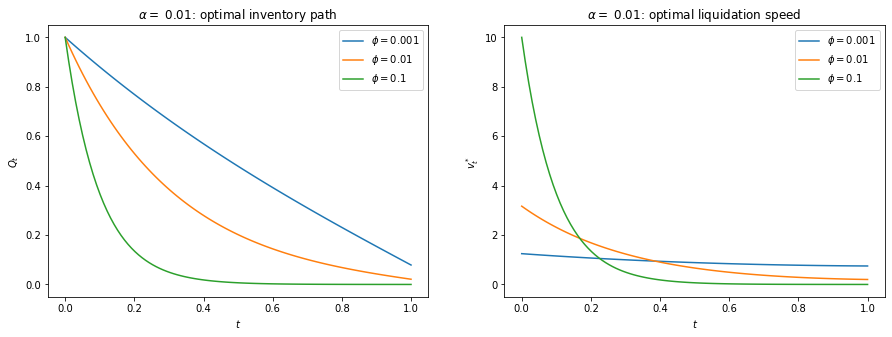

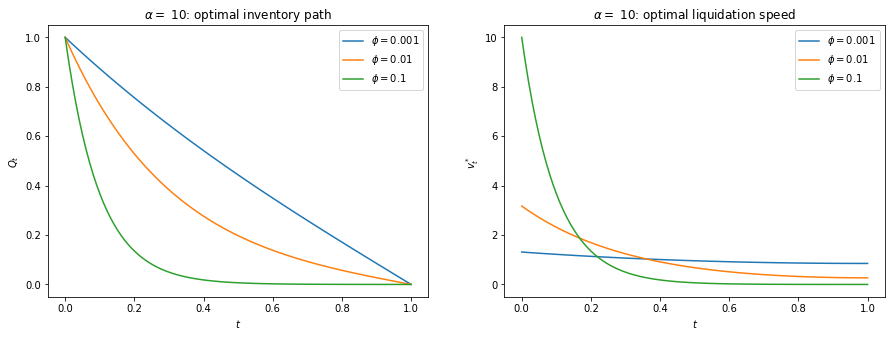

In [ ]:
T, kappa, b, q0 = 1, 1e-3, 1e-3, 1

t = np.linspace(0,T,100)

alpha_all = [0.01, 10]
phi_all = [0.001, 0.01, 0.1]

for alpha in alpha_all:
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
    for phi in phi_all:
        v = OptimalV(t, T, kappa, b, alpha, phi, q0)
        q = OptimalQ(t, T, kappa, b, alpha, phi, q0)
        ax1.plot(t, q, label = '$\phi=$' + str(phi))
        ax2.plot(t, v, label = '$\phi=$' + str(phi))
    ax1.set_xlabel(r'$t$')
    ax2.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$Q_t$ ')
    ax2.set_ylabel(r'$v^*_t$ ')
    ax1.set_title(r'$\alpha=$ {}: optimal inventory path'.format(alpha))
    ax2.set_title(r'$\alpha=$ {}: optimal liquidation speed'.format(alpha))
    ax1.legend()
    ax2.legend()